1. В различных районах города были проведены исследования загрязнения
воздуха вредными примесями. Таблица содержит усредненные значения
показателей уровня СО (Х1) и пыли (Х2) в процентах от ПДК (V - номер варианта) в
разных районах города.
Построить дерево иерархической группировки, используя при этом
агломеративный алгоритм; евклидову метрику. Расстояние между группами
определять
а) по «дальнему» соседу
б) по «ближайшему» соседу.

2. Визуализировать объекты набора данных из лабораторной работы 3 или 4 в
двумерном пространстве, используя только числовые переменные с помощью
а) PCA (метод главных компонент).
б) tSNE
в) UMAP

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [ ]:
df = pd.DataFrame({'X1': [42, 98, 32, 27, 2, 102, 228, 112, 122, 178],
                   'X2': [12, 108, 22, 17, 103, 122, 218, 92, 198, 158]})
df

,X1,X2
0,42,12
1,98,108
2,32,22
3,27,17
4,2,103
5,102,122
6,228,218
7,112,92
8,122,198
9,178,158


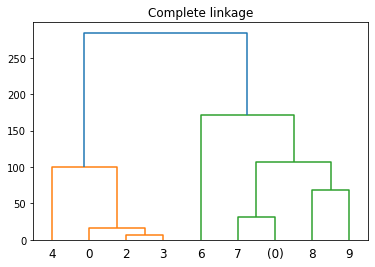

In [ ]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
# leaf node
            else:
                current_count += counts[child_idx - n_samples]
                counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)



model = AgglomerativeClustering(distance_threshold = 0, affinity = 'euclidean', linkage = 'complete', n_clusters = None)
model = model.fit(df)
plt.title("Complete linkage")
plot_dendrogram(model, truncate_mode = "level", p=3)
plt.show()

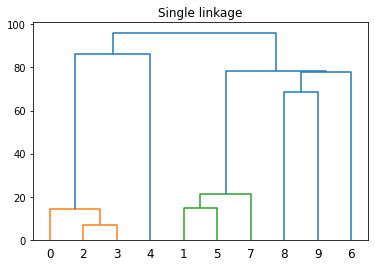

In [ ]:
model = AgglomerativeClustering(distance_threshold = 0, affinity = 'euclidean', linkage = 'single', n_clusters = None)
model = model.fit(df)
plt.title("Single linkage")
plot_dendrogram(model, truncate_mode = "level", p=3)
plt.show()

data set №7 - https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

In [ ]:
df = pd.read_csv('/content/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


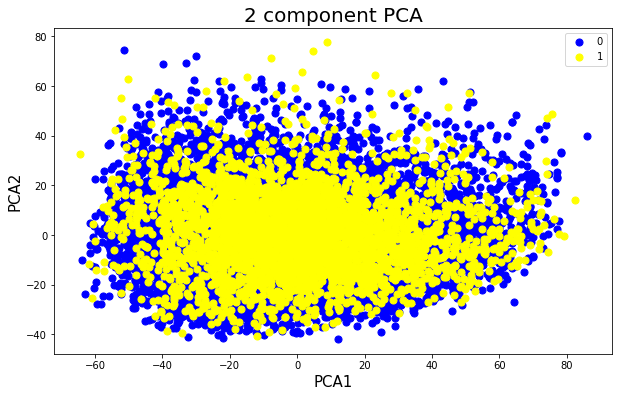

In [ ]:
# оставим перекодированные Rain Today и Rain Tommorow
le = LabelEncoder()
df = df.dropna()
df = df.drop(columns = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis = 1)
df.loc[:, ['RainToday']] = df.loc[:, ['RainToday']].apply(le.fit_transform)
df.loc[:, ['RainTomorrow']] = df.loc[:, ['RainTomorrow']].apply(le.fit_transform) 

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df.iloc[:, :17])
principalDf = pd.DataFrame(data = principalComponents , columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, df[['RainTomorrow']]], axis = 1)
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PCA1', fontsize = 15)
ax.set_ylabel('PCA2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['blue', 'yellow']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['RainTomorrow'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], finalDf.loc[indicesToKeep, 'PC2'], c = color, s = 50)
ax.legend(targets)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


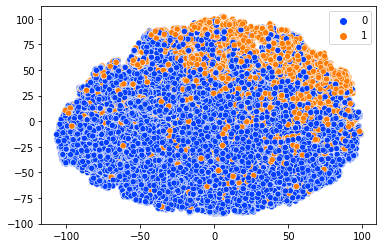

In [ ]:
X_embedded = TSNE(n_components = 2, learning_rate = 'auto', init = 'random').fit_transform(df.iloc[:, :17])
y = (np.transpose(np.array(df[['RainTomorrow']]))).tolist()[0]
y = np.array(y)
unique, counts = np.unique(y, return_counts = True)
dict(zip(unique, counts))

palette = sns.color_palette("bright", 2)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)

In [ ]:
!pip install umap-learn
import umap.umap_ as umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=f47f5a1b199dfc83ca0d69e5b83c8b0907198686b1ff0785e0028b564435053e
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=be943949bde968bc31320953a713d34fc1fca8bdea9f9ae7b757c7546370b7ab
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


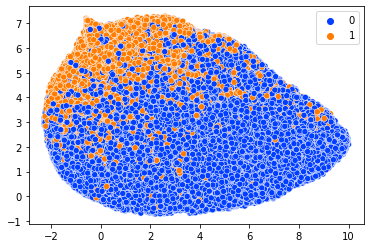

In [ ]:
embedding = umap.UMAP(n_neighbors = 100).fit_transform(df.iloc[:, :17])
palette = sns.color_palette("bright", 2)
sns.scatterplot(embedding[:,0], embedding[:,1], hue=y, legend='full', palette=palette)

четкого разделения нет